### Aula 1: Exercícios

Para estes exercícios, iremos utilizar duas bases:

1) base fictícia de funcionários criada por cientistas de dados da IBM.

**Variáveis:**
- **Age:** Idade
- **Attrition:** Se saiu da empresa (Sim ou não)
- **BusinessTravel:** Frequência de viagens a trabalho
- **DailyRate:** Custo do funcionário por dia
- **Department:** Departamento
- **DistanceFromHome:** Distância do trabalho até a casa do funcionário
- **Education:** Nível de educação:
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'
- **EducationField:** Área da educação
- **EmployeeNumber:** ID do funcionário
- **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **Gender:** Gênero
- **HourlyRate:** Valor/hora
- **JobInvolvement:** Nível de envolvimento com o trabalho (psicologica e emocionalmente):
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **JobLevel:** Nível do funcionário
- **JobRole:** Cargo
- **JobSatisfaction:** Nível de satisfação com o trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **MaritalStatus:** Estado Civil
- **NumCompaniesWorked:** Número de empresas que já trabalhou
- **PercentSalaryHike:** Aumento salarial (%)
- **PerformanceRating:** Nível de performance:
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'
- **RelationshipSatisfaction:** Satisfação de relacionamento:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **TotalWorkingYears:** Número de anos trabalhados
- **TrainingTimesLastYear:** Número de treinamentos no ano anterior
- **WorkLifeBalance:** Equilíbrio da vida profissional
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
- **YearsAtCompany:** Anos na empresa
- **YearsInCurrentRole:** Anos na posição atual
- **YearsSinceLastPromotion:** Anos desde a última promoção
- **YearsWithCurrManager:** Anos com o mesmo gestor

2) Base de dados de casos e óbitos de covid no estado de SP.

- **nome_munic:** Nome do município
- **codigo_ibge:** Código do município no IBGE (7 dígitos)
- **casos:** Casos totais registrados até a data
- **casos_novos:** Casos novos registrados na data
- **obitos:** Óbitos totais registrados até a data
- **obitos_novos:** Óbitos novos registrados na data
- **nome_drs:** Nome do Dpto. Regional de Saúde
- **cod_drs:** Código do Dpto. Regional de Saúde
- **pop:** População Estimada (fonte: SEADE)
- **pop60:** População acima de 60 anos (fonte: SEADE)
- **ano_mes:** Ano e mês dos dados

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [276]:
df1 = pd.read_csv('./data/IBM_Employees.csv')

In [277]:
df2 = pd.read_csv('./data/dados_covid_sp_20.csv')

## Exercício 1:
Utilizando a base de dados da IBM:

**a)** Faça um gráfico de dispersão (scatter plot) com a variável *YearsAtCompany* no eixo X e a variável *DailyRate* no eixo Y. Coloque o título "YearsAtCompany x DailyRate" e determine o tamanho da imagem como (10,5).

<AxesSubplot:title={'center':'YearsAtCompany x DailyRate'}, xlabel='YearsAtCompany', ylabel='DailyRate'>

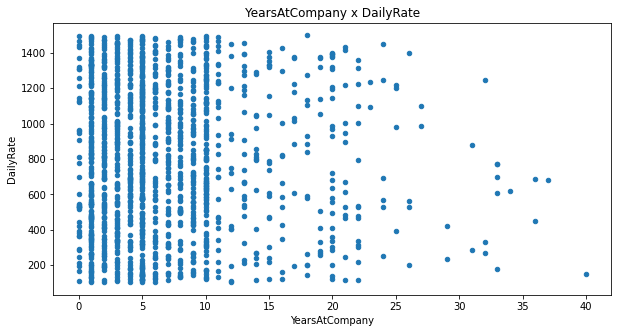

In [278]:
df1.plot(x='YearsAtCompany', y='DailyRate', kind='scatter', title='YearsAtCompany x DailyRate', figsize = (10,5))

**b)** Repita o gráfico do item a, identificando as observações do gênero feminino com a cor vermelha e do gênero masculino com a cor verde. Não esqueça de inserir legenda para as cores.

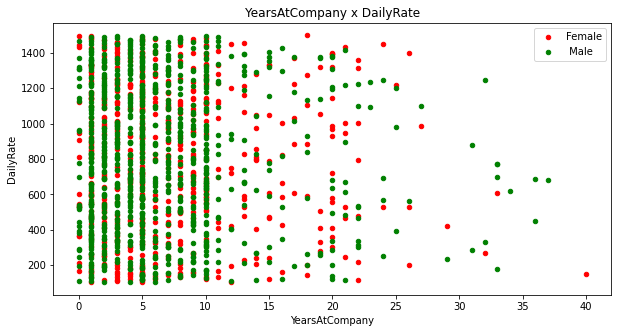

In [279]:
af = df1[df1['Gender']=='Female'].plot(x='YearsAtCompany', y='DailyRate', kind='scatter', title='YearsAtCompany x DailyRate', figsize = (10,5), color = 'red', label = 'Female')
am = df1[df1['Gender']=='Male'].plot(x='YearsAtCompany', y='DailyRate', kind='scatter', title='YearsAtCompany x DailyRate', figsize = (10,5), color = 'green', label = ' Male', ax = af)

**c)** Repita o gráfico do item a, porém agora identificando os funcionários pela variável 'JobSatisfaction', 
utilizando a seguinte escala de cores:
- cor: '#FFE4E1' para 'Low' 
- cor: '#FFB6C1' para 'Medium' 
- cor: '#FF69B4' para 'High' 
- cor: '#C71585' para 'Very High' 

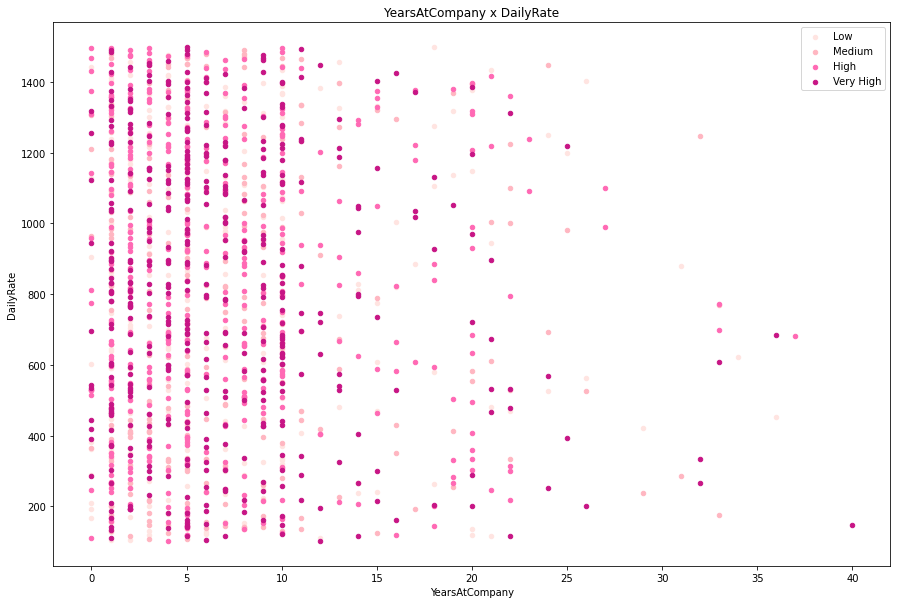

In [280]:
a = df1[df1['JobSatisfaction'] == 1].plot(x='YearsAtCompany', y='DailyRate', kind='scatter', title='YearsAtCompany x DailyRate', figsize = (15,10), color ='#FFE4E1', label = 'Low')
b = df1[df1['JobSatisfaction'] == 2].plot(x='YearsAtCompany', y='DailyRate', kind='scatter', title='YearsAtCompany x DailyRate', figsize = (15,10), color = '#FFB6C1',label = 'Medium', ax = a)
c = df1[df1['JobSatisfaction'] == 3].plot(x='YearsAtCompany', y='DailyRate', kind='scatter', title='YearsAtCompany x DailyRate', figsize = (15,10), color = '#FF69B4', label = 'High', ax = b)
d = df1[df1['JobSatisfaction'] == 4].plot(x='YearsAtCompany', y='DailyRate', kind='scatter', title='YearsAtCompany x DailyRate', figsize = (15,10), color = '#C71585', label = 'Very High', ax = c)



**d)** Observando os gráficos desenhados, você diria que o tempo na empresa, o gênero e/ou a satisfação no trabalho tem relação com o gasto diário com o colaborador?

## Exercício 2

**a)** Utilizando a base de dados de covid, crie um gráfico de linhas mostrando a evolução do número de casos novos mês a mês, para as DRS 'Grande São Paulo', 'São José do Rio Preto' e 'Marília'. Identifique os DRS por cores e legenda. Não esqueça de colocar título para o gráfico e para os eixos. 

In [281]:
gs = df2[df2['nome_drs'] == 'Grande São Paulo'].groupby('ano_mes')['casos_novos'].sum()
sjrp = df2[df2['nome_drs'] == 'São José do Rio Preto'].groupby('ano_mes')['casos_novos'].sum()
mar = df2[df2['nome_drs'] == 'Marília'].groupby('ano_mes')['casos_novos'].sum()
gs


ano_mes
2020-02        1
2020-03     2186
2020-04    22094
2020-05    60332
2020-06     9631
Name: casos_novos, dtype: int64

<AxesSubplot:xlabel='ano_mes', ylabel='casos novos'>

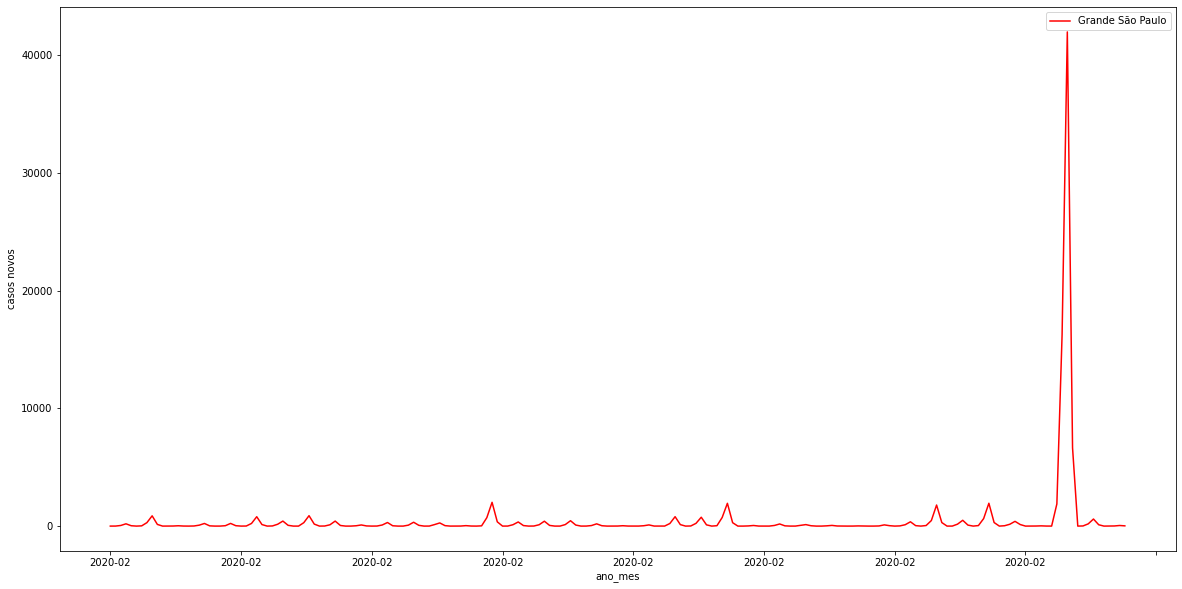

In [282]:
df2[df2['nome_drs'] == 'Grande São Paulo'].plot(x='ano_mes', y='casos_novos', kind='line', ylabel='casos novos', figsize=(20,10), color= 'red', label = 'Grande São Paulo')

Text(0.5, 1.0, 'Novos casos novos por mês')

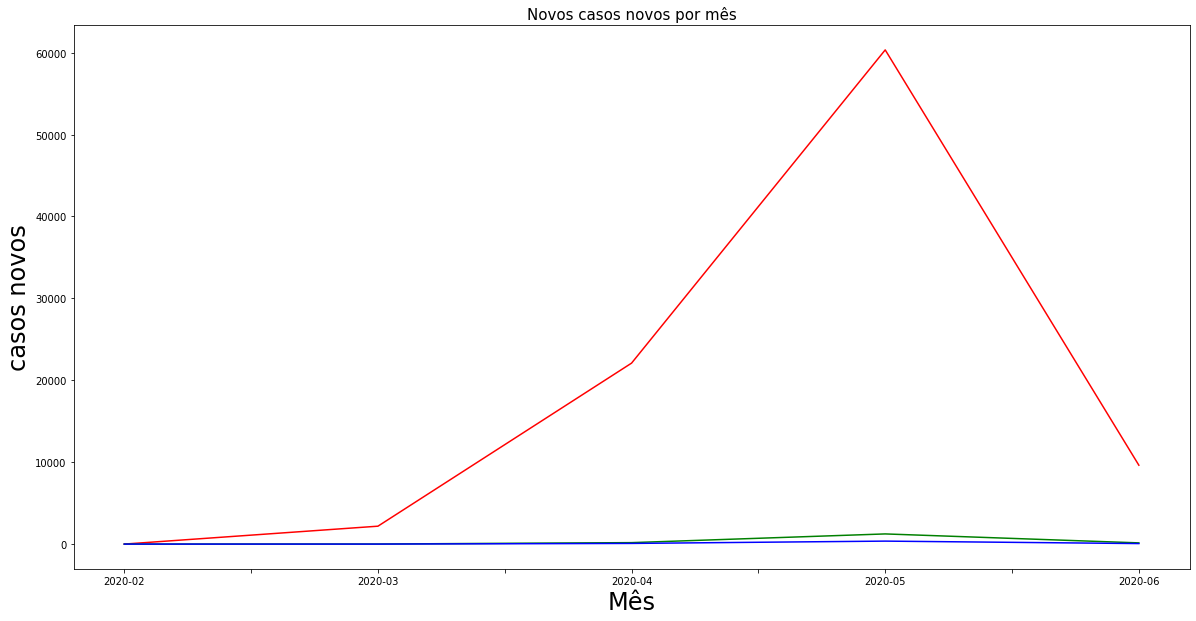

In [283]:
axgs = gs.plot(x='ano_mes', y='casos_novos', kind='line', ylabel='casos novos', figsize=(20,10), color= 'red', label = 'Grande São Paulo')
axsjrp = sjrp.plot(x='ano_mes', y='casos_novos', kind='line', ylabel='casos novos', figsize=(20,10), ax = axgs, color = 'green', label = 'teste')
axmar = mar.plot(x='ano_mes', y='casos_novos', kind='line', ylabel='casos novos', figsize=(20,10), ax = axgs, color = 'blue')

axgs.set_xlabel('Mês', fontdict={'fontsize' : 24})
axgs.set_ylabel('casos novos', size = 24)
axgs.set_title('Novos casos novos por mês', size=15)

In [284]:
df2_piv = df2.pivot_table(index="ano_mes", columns="nome_drs", values="casos_novos", aggfunc="sum")
df2_piv = df2_piv[['Grande São Paulo', 'São José do Rio Preto', 'Marília']]
df2_piv

nome_drs,Grande São Paulo,São José do Rio Preto,Marília
ano_mes,,,
2020-02,1,0,0
2020-03,2186,7,0
2020-04,22094,178,82
2020-05,60332,1241,363
2020-06,9631,148,64


**b)** Repita o gráfico do item a trocando as cores dos DRS.

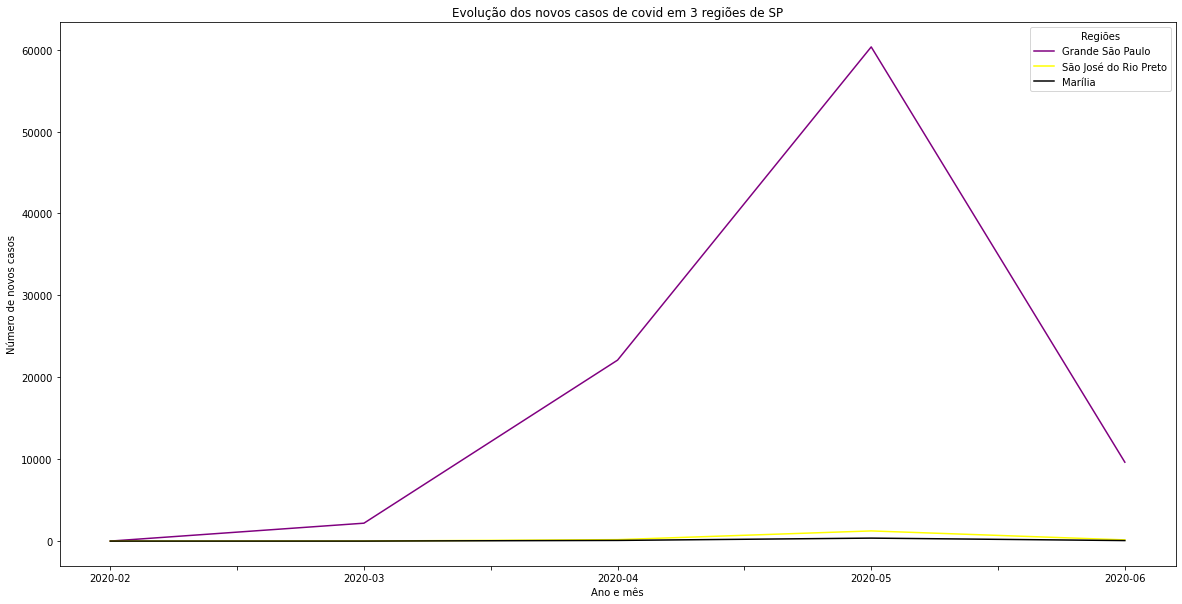

In [300]:
exb = df2_piv.plot(kind="line", title="Evolução dos novos casos de covid em 3 regiões de SP", figsize=(20,10),
                 xlabel="Ano e mês", ylabel="Número de novos casos", color=["purple", "yellow", "black"])
exb.legend(title="Regiões")

**c)** Considerando apenas os DRS 'Bauru', 'São José do Rio Preto' e 'Marília', faça três gráficos de pizza, para os meses de abril, maio e junho, mostrando a porcentagem de novos óbitos em cada DRS.

In [331]:
dfbauru = df2[df2['nome_drs'] == 'Bauru']
dfsjrp = df2[df2['nome_drs'] == 'São José do Rio Preto']
dfmarilia = df2[df2['nome_drs'] == 'Marília']
df3 =pd.concat([dfbauru, dfsjrp, dfmarilia])
t

,nome_munic,codigo_ibge,nome_drs,cod_drs,pop,pop_60,ano_mes,casos,casos_novos,obitos,obitos_novos
15,Agudos,3500709,Bauru,12.0,36134.0,5524.0,2020-02,0,0,0,0
16,Agudos,3500709,Bauru,12.0,36134.0,5524.0,2020-03,0,0,0,0
17,Agudos,3500709,Bauru,12.0,36134.0,5524.0,2020-04,152,15,23,1
18,Agudos,3500709,Bauru,12.0,36134.0,5524.0,2020-05,617,8,31,0
19,Agudos,3500709,Bauru,12.0,36134.0,5524.0,2020-06,108,9,4,0
...,...,...,...,...,...,...,...,...,...,...,...
3220,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-02,0,0,0,0
3221,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-03,0,0,0,0
3222,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-04,0,0,0,0
3223,Óleo,3533809,Marília,5.0,2527.0,597.0,2020-05,0,0,0,0


In [332]:
df3 = df3.pivot_table(index='ano_mes',columns='nome_drs',values='obitos_novos',aggfunc='sum')

df3

nome_drs,Bauru,Marília,São José do Rio Preto
ano_mes,,,
2020-02,0,0,0
2020-03,0,0,0
2020-04,26,9,12
2020-05,49,14,45
2020-06,4,2,9


array([<AxesSubplot:ylabel='2020-04'>, <AxesSubplot:ylabel='2020-05'>,
       <AxesSubplot:ylabel='2020-06'>], dtype=object)

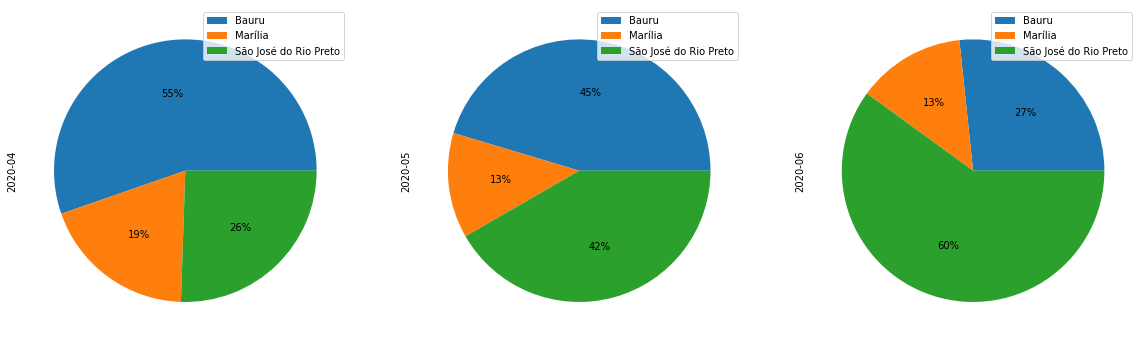

In [334]:
df3[2:].T.plot(kind='pie',subplots=True,figsize=(20,10),autopct='%1.0f%%',labeldistance=None)

In [289]:
df2_pizza2 = teste.pivot_table(index="ano_mes", columns="nome_drs", values="obitos_novos", aggfunc="sum")
df2_pizza2 = df2_pizza2[['Bauru', 'São José do Rio Preto' , 'Marília']]
df2_pizza2

AttributeError: 'Categorical' object has no attribute 'pivot_table'